In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### load data

['/content/gdrive/My Drive/Data/emotion_classification/train/subject02.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject02.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject12.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject04.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject09.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject13.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject04.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject13.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject10.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject10.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject05.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject07.sad.gif', '/content/gdrive/My Drive/Dat

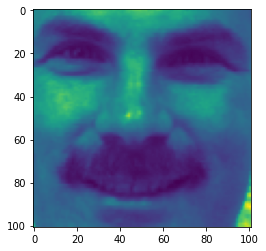

[[115 115 117 ... 220 227 213]
 [ 71  87 105 ...  65  66  71]
 [ 65  76  83 ...  57  53  54]
 ...
 [ 25  34  46 ... 163 227 255]
 [109 110 108 ... 255 255 255]
 [ 17  18  18 ...  76  67  61]]
[1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1]


In [3]:
import glob
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




filelist = glob.glob("/content/gdrive/My Drive/Data/emotion_classification/train/*.gif")
print(filelist)
img = mpimg.imread('/content/gdrive/My Drive/Data/emotion_classification/train/subject02.happy.gif')
imgplot = plt.imshow(img)
plt.show()


images = [(np.array(Image.open(file))).flatten() for file in filelist]
images=np.array(images)
print(images)
y=[]
for f in filelist:
    if f.find("sad")==-1: #assign y value as 1 if  it is happy face else -1
        y.append(1)
    else:
        y.append(-1)
print(y)   

# PCA 

### finding covariance of the centered data

In [4]:
sum=[0]
for i in range(20):
    sum = sum + images[i]
mean=sum/20             #mean of the original data
print(mean)    
 


new=[]
for i in range (20):
    new.append(np.array(np.subtract(images[i],mean) ))    #centering the data
new=np.array(new)
print(new.shape)



X=new
X_t=new.transpose()
print(X_t.shape)
co_small=(np.dot(X,X_t))/20          #covariance of the centered data
print(co_small.shape)


[ 59.65  66.    70.85 ... 101.25 110.15 118.55]
(20, 10201)
(10201, 20)
(20, 20)


In [5]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(images)
# small= scaler.transform(images)
# small.shape

# co_small=np.cov(small)
# small
# print(small)
# small.shape

### finding eigen values and eigen vectors of covariance matrix

In [6]:
k=17     #At k=17  the maximum seperability is obtained with variance percentage of 98.4%
w, v=np.linalg.eig(co_small)        #eigen values and eigen vectors of the X.X_t matrix
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[:,idx]
v=v.T
print(w)



eigen=[]
for i in range(20):
  eigen.append(np.array(new.T@v[i])/math.sqrt(20*abs(w[i])))       #finding eigen vectors of X_t.X from X.X_t eigen vectors
  #print(eigen[i])
eigen=np.array(eigen)
eigen.shape

[ 4.06759336e+06  1.96610731e+06  1.62346258e+06  9.66801086e+05
  7.67244620e+05  7.42652455e+05  6.27036637e+05  5.03979384e+05
  3.93172886e+05  3.77408962e+05  3.22550271e+05  3.13076558e+05
  2.37484588e+05  2.11947431e+05  1.80493589e+05  1.69641814e+05
  1.44597825e+05  1.23092610e+05  8.69760076e+04 -1.24796349e-10]


(20, 10201)

In [7]:
total_eigen=np.sum(w)
print(total_eigen)
sum_eigen=0
c=0
for i in w:
  sum_eigen=sum_eigen+i
  percent=sum_eigen/total_eigen
  c=c+1
  print('for k= %d the percentage is %f' %( c,percent)) 

13825319.972500008
for k= 1 the percentage is 0.294213
for k= 2 the percentage is 0.436424
for k= 3 the percentage is 0.553851
for k= 4 the percentage is 0.623780
for k= 5 the percentage is 0.679276
for k= 6 the percentage is 0.732993
for k= 7 the percentage is 0.778347
for k= 8 the percentage is 0.814800
for k= 9 the percentage is 0.843239
for k= 10 the percentage is 0.870537
for k= 11 the percentage is 0.893868
for k= 12 the percentage is 0.916513
for k= 13 the percentage is 0.933691
for k= 14 the percentage is 0.949021
for k= 15 the percentage is 0.962076
for k= 16 the percentage is 0.974347
for k= 17 the percentage is 0.984806
for k= 18 the percentage is 0.993709
for k= 19 the percentage is 1.000000
for k= 20 the percentage is 1.000000


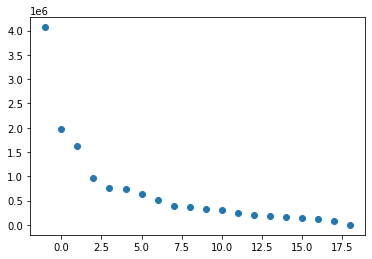

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.plot(w)
plt.scatter(x=range(-1,19),y=w[:20])
#sns.lineplot(x=range(0.20),y=w[:20])

plt.show()

In [9]:
new_X=eigen[:k].dot(new.T)          #projecting the original data on PCA components
new_X=new_X.T               
new_X.shape

(20, 17)

# IDA

### finding mean of each class

In [10]:
""" we use fisher classifer to detect the emotion on the face.
    S_b gives the covariance between classes
    and S_w gives the covariance within the class
    to get the best classifier , the covariance between classes should be maximum 
    and covariance within class points is minimum.
    the fisher classifier is defined as the max eigen vector of the inv(S_w)S_b """
p=0
n=0
check=[]
p_mean=[0]
n_mean=[0]
for i in range(20):
  if y[i]==1:
    p=p+1
    p_mean=p_mean + new_X[i]
  else:
    n=n+1
    n_mean=n_mean + new_X[i] 
    
# print(p_mean[0])
# print(np.sum(check))
# print(np.sum(check)/9)
n_mean=np.array(n_mean/n)
p_mean=np.array(p_mean/p)

total_mean=np.mean(new_X,axis=0).reshape(k,1)
n_mean=n_mean.reshape(-1,1)
p_mean=p_mean.reshape(-1,1)

### finding S_w and S_b 

In [11]:
# w=(p_mean-n_mean)/np.linalg.norm(p_mean-n_mean)
# w.shape

# S_b=(p_mean-total_mean)@(p_mean-total_mean).T + (n_mean-total_mean)@(n_mean-total_mean).T
# #print(S_b)
# S_b.shape

In [12]:
S_b=(p_mean-n_mean)@(p_mean-n_mean).T 
# print(S_b)

In [13]:
c_1=[0][0]
c_2=[0][0]
p_count=0
n_count=0
pos=[]
neg=[]

for i in range(20):
    if y[i]==1:
      x,m=new_X[i].reshape(k,1),p_mean.reshape(k,1)
      c_1=c_1+(x-m).dot((x-m).T)
      pos.append(np.array(new_X[i]))
      p_count=p_count+1
    else:
        x,m=new_X[i].reshape(k,1),n_mean.reshape(k,1)
        c_2=c_2+(x-m).dot((x-m).T)
        neg.append(np.array(new_X[i]))
        n_count=n_count+1
print(c_1.shape)        
c_1=np.array(c_1)
c_2=np.array(c_2)
print(c_1.shape)
# cov_c1=c_1.dot(c_1.T)    
# cov_c2=c_2.dot(c_2.T)         

(17, 17)
(17, 17)


In [14]:
# pos=np.array(pos)
# neg=np.array(neg)
# cov_c1=np.cov(pos.T)
# cov_c2=np.cov(neg.T)


# c_1=c_1/p_count
# print(p_count)

# c_2=c_2/n_count
# print(n_count)

In [15]:
S_w=c_1+c_2
#S_w=cov_c1+cov_c2
S_w=np.array(S_w)

In [16]:
S_w

array([[ 8.07144904e+07, -2.06351043e+06, -3.30580391e+05,
        -4.68269776e+05, -7.31647115e+05,  9.71500620e+05,
         3.17105207e+05, -1.21522633e+06,  2.69455289e+05,
        -9.36810675e+04, -3.92707692e+04,  7.05773652e+05,
         6.67943573e+05,  4.40497550e+04, -4.09537010e+03,
         2.13969480e+05,  2.11444257e+05],
       [-2.06351043e+06,  3.26415214e+07, -1.07025557e+06,
        -1.51602561e+06, -2.36871098e+06,  3.14523783e+06,
         1.02662960e+06, -3.93430098e+06,  8.72362769e+05,
        -3.03292898e+05, -1.27139300e+05,  2.28494552e+06,
         2.16247046e+06,  1.42611289e+05, -1.32587800e+04,
         6.92727199e+05,  6.84551777e+05],
       [-3.30580391e+05, -1.07025557e+06,  3.22977936e+07,
        -2.42871725e+05, -3.79474410e+05,  5.03876278e+05,
         1.64469057e+05, -6.30286496e+05,  1.39755061e+05,
        -4.85884071e+04, -2.03680869e+04,  3.66054939e+05,
         3.46434078e+05,  2.28467447e+04, -2.12409524e+03,
         1.10976918e+05,  1.0

In [17]:
inv_S_w=np.linalg.inv(S_w)
sol_mat=inv_S_w@S_b
#print(sol_mat)
e_values ,e_vector=np.linalg.eig(sol_mat)
idx = np.argsort(e_values)[::-1]
e_values = e_values[idx]
e_vector = e_vector[:,idx]
e_vector=np.transpose(e_vector)
print(e_values)
print(e_values[0])

[ 2.79968188e+00+0.00000000e+00j  4.50552974e-17+1.72568915e-17j
  4.50552974e-17-1.72568915e-17j  5.01492435e-18+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -2.72175445e-20+0.00000000e+00j
 -1.14598431e-19+0.00000000e+00j -3.74910489e-19+0.00000000e+00j
 -1.54296733e-18+0.00000000e+00j -5.73976841e-18+0.00000000e+00j
 -1.23908853e-17+3.06167712e-17j -1.23908853e-17-3.06167712e-17j
 -1.34245811e-17+0.00000000e+00j -4.99310391e-17+4.59692126e-17j
 -4.99310391e-17-4.59692126e-17j -8.60140694e-17+2.16737110e-16j
 -8.60140694e-17-2.16737110e-16j]
(2.799681879263563+0j)


In [18]:
ww=( new_X@e_vector[0])
ww

array([ 729.39251829+0.j, -447.58959253+0.j, -618.05619307+0.j,
       -146.89034564+0.j,  693.73109562+0.j, -631.84303223+0.j,
        240.79148979+0.j,  827.76068067+0.j, -697.15089154+0.j,
        779.79816917+0.j, -755.38798237+0.j, -598.77606017+0.j,
        787.43514337+0.j, -446.71892752+0.j,  627.50093242+0.j,
       -650.14918616+0.j,  879.3936626 +0.j, -732.89753041+0.j,
        763.60190266+0.j, -603.94585296+0.j])

In [19]:
y_pred=[]
for i in new_X:
  pred=i.reshape(1,k)@e_vector[0]
  y_pred.append(pred)
  if pred>1:
    print(1)
  else:
    print(-1)    

1
-1
-1
-1
1
-1
1
1
-1
1
-1
-1
1
-1
1
-1
1
-1
1
-1


### plotting one dimeansional feature of images

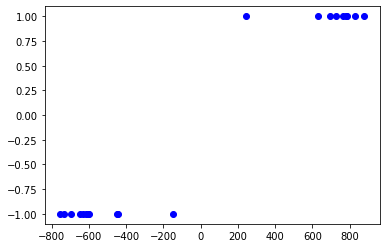

In [20]:
plt.plot(ww.real,y,"ob")

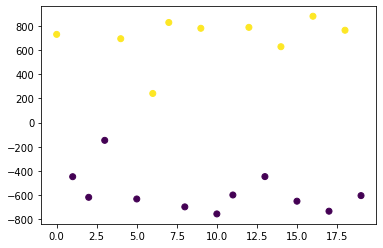

In [21]:
plt.scatter(range(0,20),(ww).real,c=y)

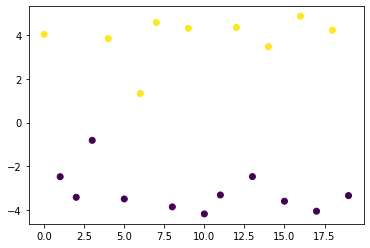

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA()
org=lda.fit_transform(new_X,y)
plt.scatter(range(0,20),org,c=y)



# Test

In [23]:


filelist_test = glob.glob("/content/gdrive/My Drive/Data/emotion_classification/test/*.gif")
print(filelist_test)



images_test = [(np.array(Image.open(file))).flatten() for file in filelist_test]
images_test=np.array(images_test)
print(images_test)
y_test=[]
for f in filelist_test:
    if f.find("sad")==-1: #assign y value as 1 if  it is happy face else -1
        y_test.append(1)
    else:
        y_test.append(-1)
print(y_test)   

['/content/gdrive/My Drive/Data/emotion_classification/test/subject14.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject11.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject08.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject14.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject05.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject03.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject08.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject15.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject15.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject01.sad.gif']
[[ 18  27  26 ...  65  64  62]
 [ 16  13  15 ... 116 109 110]
 [119 119 118 ...  59  65  78]
 ...
 [123 123 123 ...  65  78  96]
 [ 58  91 111 ...  43  50  57]
 [158 167 174 ... 118 117 118]]
[1, 1

## PCA on test

In [24]:
sum=[0]
for i in range(len(images_test)):
    sum = sum + images_test[i]
mean=sum/20             #mean of the original data
print(mean)    
 

# var_matrix=np.cov(images) 
# for i in range(len(small)):
#   new[i]=new[i]/small[i][i]


new_test=[]
for i in range (len(images_test)):
    new_test.append(np.array(np.subtract(images_test[i],mean) ))    #centering the data
new_test=np.array(new_test)
print(new_test)



X=new_test
X_t=new_test.transpose()
print(X_t.shape)

# co_small_test=(np.dot(X,X_t))/20          #covariance of the centered data
# print(co_small_test.shape)




[35.85 40.   43.05 ... 37.1  41.75 47.9 ]
[[-17.85 -13.   -17.05 ...  27.9   22.25  14.1 ]
 [-19.85 -27.   -28.05 ...  78.9   67.25  62.1 ]
 [ 83.15  79.    74.95 ...  21.9   23.25  30.1 ]
 ...
 [ 87.15  83.    79.95 ...  27.9   36.25  48.1 ]
 [ 22.15  51.    67.95 ...   5.9    8.25   9.1 ]
 [122.15 127.   130.95 ...  80.9   75.25  70.1 ]]
(10201, 10)


In [25]:

# w, v=np.linalg.eig(co_small_test)        #eigen values and eigen vectors of the covariance matrix
# idx = np.argsort(w)[::-1]
# w = w[idx]
# v = v[:,idx]
# print(w.shape)
# eigen=[]



# for i in range(k):
#   eigen.append(np.array(new_test.T@v[i])/math.sqrt(20*abs(w[i])))
#   #print(eigen[i])

# v.shape
# eigen=np.array(eigen)
# eigen.shape

In [26]:
new_X_test=eigen[:k].dot(new_test.T)
new_X_test=new_X_test.T
new_X_test.shape

(10, 17)

## plotting one dimentional feature of test images

In [27]:
y_pred=[]
for i in new_X_test:
  pred=i@e_vector[0]
  if pred>1:
    y_pred.append(1)
    print(1)
  else:
    y_pred.append(-1)
    print(-1)    

1
1
1
-1
1
1
-1
-1
1
-1


In [28]:
ww_test=new_X_test@e_vector[0]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


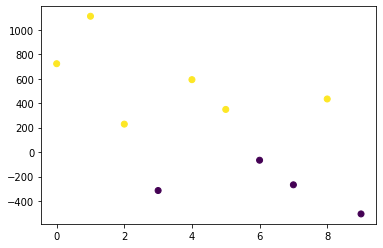

In [29]:
plt.scatter(range(0,10),ww_test,c=y_test)

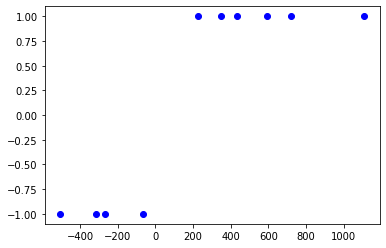

In [30]:
plt.plot(ww_test.real,y_test,"ob")

In [31]:
y_pred

[1, 1, 1, -1, 1, 1, -1, -1, 1, -1]

## accuracy on test data

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

the maximum separability is obtained at k=17